In [2]:
bucket_dir = 'gs://pstat135-voter-file/VM2Uniform/'
df = spark.read.parquet(bucket_dir + 'VM2Uniform--WY--2021-01-13')


# PSTAT 135 Group Project
# Quality of School District and Voting Outcomes

#### Group 19: Adam Alcala, Yixuan Li, Lex Navarra, Richard Zhao

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

##### Is there a connection between the quality of school district and voter turnout?

For our PSTAT 135 Final Project, we want to explore the connection between the quality of school district and voter turnout for states across the nation. We feel that this will be an interesting connection because of the known influence that education can make on if a person decides to vote or not, and how they decide to vote if so. For the rest of our project, we will aim to observe the relationship between school district quality and voter turnout not only between the counties within a particular state, but between states across the nation based on region, political party, and more.

We conducted our EDA by just examining the data for one state: Wyoming. We decided to take a closer look at these columns:
1. County
2. Unified School Disctrict
3. Commercial Data: Education

In [14]:
df.select(['County']).distinct().show()

+-----------+
|     County|
+-----------+
|      CROOK|
|   CAMPBELL|
|    JOHNSON|
|    FREMONT|
|     WESTON|
|   CONVERSE|
|     GOSHEN|
|   SUBLETTE|
|     PLATTE|
|   WASHAKIE|
|HOT SPRINGS|
| SWEETWATER|
|   NIOBRARA|
|       PARK|
|      UINTA|
|     CARBON|
|   BIG HORN|
|    LARAMIE|
|   SHERIDAN|
|    NATRONA|
+-----------+
only showing top 20 rows



In [5]:
df.select(['County']).distinct().count()

23

There are 23 counties in total for Wyoming. This is what lets us determine the voter turnout in school districts. Lets see if there is a lot of missing data.

<AxesSubplot:>

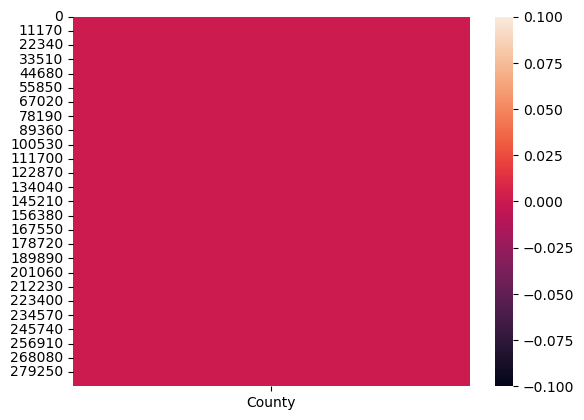

In [12]:
sample_df = df.select('County')
pandas_df = sample_df.toPandas()

# Convert all values to T/F
tf_df = pandas_df.isnull()

# Plot it
sns.heatmap(data=tf_df)

Since there are no white lines, no data is missing for Counties. Lets do the same for Unified School Districts.

In [15]:
df.select(['Unified_School_District']).distinct().count()

48

There are 48 Unique School Districts in Wyoming. Lets see how much data is missing.

<AxesSubplot:>

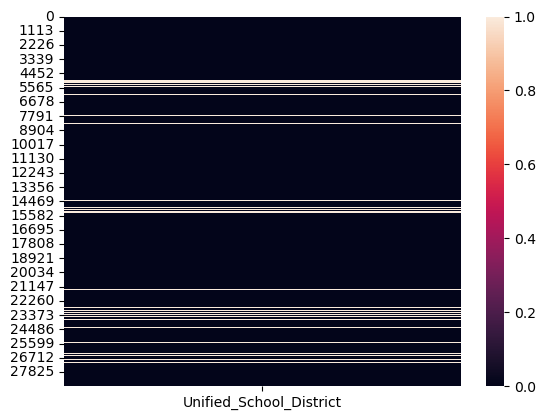

In [10]:
sample_df = df.select('Unified_School_District').sample(False, 0.1, 42)
pandas_df = sample_df.toPandas()

# Convert all values to T/F
tf_df = pandas_df.isnull()

# Plot it
sns.heatmap(data=tf_df)

There is some missing data throughout the column. However, there is more than enough data present that we can simply remove the missing values. Lastly, lets check the Education Data.

<AxesSubplot:>

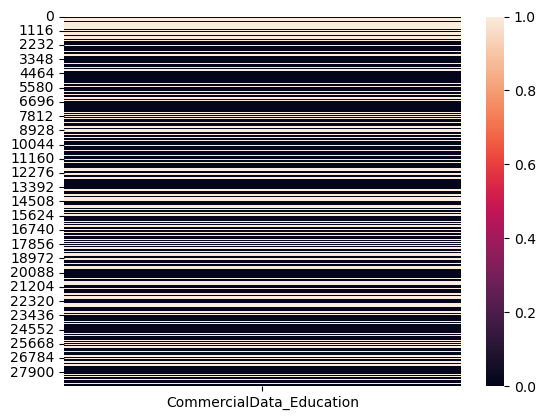

In [16]:
sample_df = df.select('CommercialData_Education').sample(False, 0.1, 42)
pandas_df = sample_df.toPandas()

# Convert all values to T/F
tf_df = pandas_df.isnull()

# Plot it
sns.heatmap(data=tf_df)

It seems like there is a lot more missing data for this column. We wanted to use this data in order to verify the quality of a school district, but perhaps there is a better way?

Right now, our project is only at the preliminary stage. If we were to use this data, it wouldn't be the most effective at representing the true quality of school districts. The biggest issues currently are to find a better way to represent school district quality, as well as a way to correlate that by county voter turnout. The columns in the data did not seem to be very clear at seperating county turnout with specific voters, so more data exploration is required. However, this was a significant step in finding out how to answer our question, and can even lead us into figuring out more specific relations or examinations.